In [5]:
# データセットの読み込み
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = \
    reuters.load_data(num_words=10000)

In [29]:
# ニュースサンプルをテキストに変換する
word_index = reuters.get_word_index()
reverse_word_index = dict([(v, k) for (k, v) in word_index.items()])

# インデックスのオフセットとして3が設定されているのは
# 0, 1, 2がそれぞれ「パディング」「シーケンスの開始」「不明」のインデックスとして
# 予約されているためであることに注意
decoded_newswire = ' '.join([reverse_word_index.get(n - 3, '?') for n in train_data[0]])

# デコードしたニュースの内容を表示
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [58]:
# 3.5.2 データの準備

# リスト3-14 データのエンコーディング
import numpy as np

# Reuters データセットを One-hot エンコーディングする
# 文章ごとに、出現した単語の値を 1. にする。出てこないものは 0. になっている
def vectorize_sequence(sequences, dimention=10000):
    results = np.zeros((len(sequences), dimention))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# 訓練データのベクトル化
x_train = vectorize_sequence(train_data)
# テストデータのベクトル化
x_test = vectorize_sequence(test_data)


# ラベルのエンコーディング

# # 46トピックにベクトル化する
# def to_one_hot(labels, dimention=46):
#     results = np.zeros((len(labels), dimention))
#     for i, label in enumerate(labels):
#         results[i, label] = 1.
#     return results
# # ベクトル化された訓練ラベル
# one_hot_train_labels = to_one_hot(train_labels)
# # ベクトル化されたテストラベル
# one_hot_test_labels = to_one_hot(test_labels)

# Keras に実装されているラベルエンコーディング機能を使う
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [59]:
# 3.5.3 ニューラルネットワークの構築

# リスト3-15: モデルの定義
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# リスト3-16: モデルのコンパイル
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [60]:
# 3.4 アプローチの検証

# リスト3-17: 検証データセットの設定
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# リスト3-18: モデルの訓練
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 143us/step - loss: 2.6827 - acc: 0.5239 - val_loss: 1.7785 - val_acc: 0.6410
Epoch 2/20
7982/7982 [==============================] - 1s 106us/step - loss: 1.4469 - acc: 0.7053 - val_loss: 1.3371 - val_acc: 0.7110
Epoch 3/20
7982/7982 [==============================] - 1s 101us/step - loss: 1.0817 - acc: 0.7711 - val_loss: 1.1870 - val_acc: 0.7400
Epoch 4/20
7982/7982 [==============================] - 1s 101us/step - loss: 0.8643 - acc: 0.8152 - val_loss: 1.0655 - val_acc: 0.7690
Epoch 5/20
7982/7982 [==============================] - 1s 116us/step - loss: 0.6952 - acc: 0.8503 - val_loss: 1.0030 - val_acc: 0.7920
Epoch 6/20
7982/7982 [==============================] - 1s 122us/step - loss: 0.5601 - acc: 0.8827 - val_loss: 0.9430 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 1s 104us/step - loss: 0.4482 - acc: 0.9058 - val_loss: 0.9169 - val_acc: 0.8200


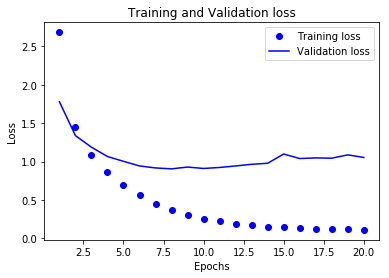

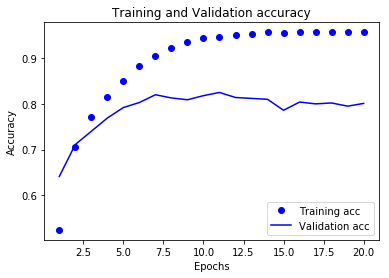

In [63]:
# リスト3-19: 訓練データと検証データでの損失値をプロット
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# リスト3-20: 訓練データと検証データでの正解率をプロット

# 図を削除
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 1s 146us/step - loss: 2.7439 - acc: 0.4424 - val_loss: 1.7841 - val_acc: 0.6260
Epoch 2/8
7982/7982 [==============================] - 1s 97us/step - loss: 1.4418 - acc: 0.6971 - val_loss: 1.3080 - val_acc: 0.7100
Epoch 3/8
7982/7982 [==============================] - 1s 97us/step - loss: 1.0651 - acc: 0.7710 - val_loss: 1.1248 - val_acc: 0.7510
Epoch 4/8
7982/7982 [==============================] - 1s 99us/step - loss: 0.8336 - acc: 0.8222 - val_loss: 1.0377 - val_acc: 0.7830
Epoch 5/8
7982/7982 [==============================] - 1s 93us/step - loss: 0.6615 - acc: 0.8619 - val_loss: 0.9669 - val_acc: 0.7960
Epoch 6/8
7982/7982 [==============================] - 1s 94us/step - loss: 0.5284 - acc: 0.8894 - val_loss: 0.9236 - val_acc: 0.8040
Epoch 7/8
7982/7982 [==============================] - 1s 102us/step - loss: 0.4219 - acc: 0.9137 - val_loss: 0.9644 - val_acc: 0.7870
Epoch 8/8
22

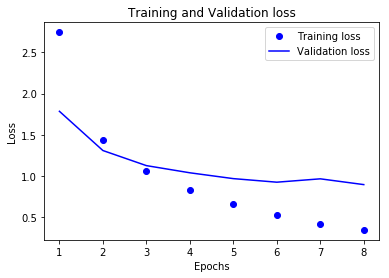

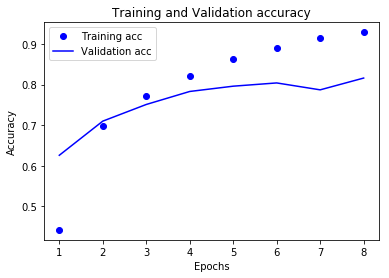

In [94]:
# 8エポックの後、過学習に陥っている。
# 新しいネットワークを8エポックで作成しなおしてみる。

# リスト3-21: モデルの訓練をやり直す
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
loss = history.history['loss']
val_loss = history.history['val_loss']

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=8,
                    batch_size=512,
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)


# グラフを描画
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 図を削除
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [87]:
# 3.5.5 新しいデータで予測値を生成する

# リスト3-22: 新しいデータの予測値を生成
predictions = model.predict(x_test)
predictions[0]

array([1.42154939e-04, 1.63565826e-04, 1.24247608e-05, 9.24604535e-01,
       6.18744083e-02, 2.33398925e-04, 1.88730392e-05, 1.11089321e-04,
       2.11091759e-03, 9.85404131e-06, 1.12728312e-05, 6.86699233e-04,
       2.73520767e-04, 1.55836431e-04, 5.91970311e-05, 2.63029178e-05,
       1.41989629e-04, 4.13246889e-05, 6.41959050e-05, 5.21904789e-04,
       2.99065444e-03, 6.67979475e-04, 3.00999545e-05, 5.30817953e-04,
       1.48722065e-05, 2.62566900e-04, 1.17692893e-04, 1.38427504e-05,
       1.77423251e-04, 4.09312721e-04, 1.81977142e-04, 6.96578529e-04,
       1.98780239e-04, 2.87869352e-06, 3.78796336e-04, 3.32027885e-05,
       1.30287628e-03, 8.43369417e-05, 1.18663311e-05, 5.15017309e-04,
       4.08363121e-05, 9.39908023e-06, 1.86457637e-05, 3.95347888e-05,
       2.50509629e-06, 4.02415435e-06], dtype=float32)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 148us/step - loss: 3.2780 - acc: 0.4009 - val_loss: 2.8364 - val_acc: 0.5420
Epoch 2/20
7982/7982 [==============================] - 1s 95us/step - loss: 2.5348 - acc: 0.5606 - val_loss: 2.3033 - val_acc: 0.5620
Epoch 3/20
7982/7982 [==============================] - 1s 95us/step - loss: 2.0638 - acc: 0.5774 - val_loss: 1.9677 - val_acc: 0.5660
Epoch 4/20
7982/7982 [==============================] - 1s 91us/step - loss: 1.7649 - acc: 0.5918 - val_loss: 1.7732 - val_acc: 0.5750
Epoch 5/20
7982/7982 [==============================] - 1s 90us/step - loss: 1.5828 - acc: 0.6084 - val_loss: 1.6791 - val_acc: 0.5850
Epoch 6/20
7982/7982 [==============================] - 1s 103us/step - loss: 1.4597 - acc: 0.6178 - val_loss: 1.5941 - val_acc: 0.5970
Epoch 7/20
7982/7982 [==============================] - 1s 91us/step - loss: 1.3639 - acc: 0.6224 - val_loss: 1.5470 - val_acc: 0.6010
Epoch

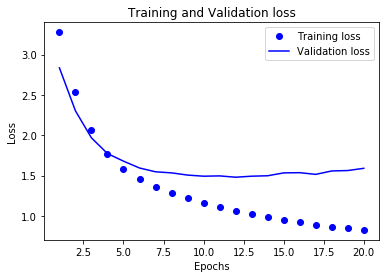

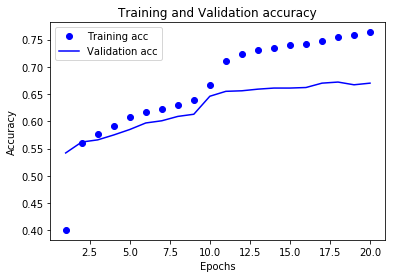

In [98]:
# 3.5.7 十分な大きさの中間層を持つことの重要性
# 出力層のユニット数よりも、中間層のユニット数を少なくしてはいけない
# どうなるか、やってみる

# リスト3-23: 情報ボトルネックを持つモデル
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(x_val, y_val))


# グラフを描画
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 図を削除
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 結論
# 中間層のユニット数 > 出力層のユニット数の場合: 検証データでの正解率は、81.6%
# 中間層のユニット数 < 出力層のユニット数の場合: 検証データでの正解率は、68.0%
# 中間層のユニット数が少ないと、正解率が低い上に、多くのエポック数が必要となってしまった。
# 中間層のユニット数は、十分な数を確保しなければならない。